### 1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import re

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

### 2. Find all of the categorical data. Save it in a categorical_df variable

In [3]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
cols = data.columns.values
cols2 = []
for i in cols:
    
    i = re.sub(r"(\w)([A-Z])", r"\1_\2", i).lower()
    cols2.append(i)
    
cols2

data.columns = cols2

data.columns = [i.lower().replace(' ', '_') for i in data.columns]
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [5]:
categorical_df = data.select_dtypes('object')
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [6]:
categorical_df

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 3. Check for NaN values

In [7]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

### 4. Check all unique values of columns

In [8]:
categorical_df.customer.unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [9]:
def v_count(df):
    for col in df:
        print(df[col].unique())


In [10]:
unique_values = v_count(categorical_df)
unique_values

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Co

### 5. Check dtypes. Do they all make sense as categorical data?

In [11]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [12]:
# dropping customer as it doesn't give us any info and is linked to a specific person...GDPR in mind
# Changing effective to date to datetime type
categorical_df = categorical_df.drop('customer', axis = 1)
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])
categorical_df.dtypes

state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employment_status            object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

### 6. Does any column contain alpha and numeric data? Decide how to clean it

In [13]:
# We have already dropped customer which had alpha and numeric
# policy and renew_offer_type  have both alpha and numeric. We will drop the alpha in policy and rename the column policy_level
# and also drop the alpha in renew offer type but keeping the column as an object

In [14]:
# pattern = '\d'
# #    text = categorical_df.policy[i]

# for i in categorical_df.policy:
#     categorical_df.policy[i] = re.sub(categorical_df.policy[i], pattern)
#     print(i)

# sample_str = "Test & [88]%%$$$#$%-+ String 90$"
# # Iterate over all characters in string using a for loop
# #  and select only those characters, which are alpha-numberic
# mod_string = ""
# for elem in sample_str:
#     if elem.isalnum():
#         mod_string += elem
# sample_str = mod_string
# print(sample_str)

In [15]:
# pattern = '[A-Z]\w+'
# categorical_df.policy = re.sub(pattern,categorical_df.policy)
# categorical_df.policy

# text = categorical_df.policy[0]
# pattern = '\d'
# print(re.findall(pattern,text))

In [16]:
def alphac(x):
    if 'Corporate L' in x:
        return x.replace('Corporate L','')
    elif 'Personal L' in x:
        return x.replace('Personal L','')
    elif 'Special L' in x:
        return x.replace('Special L','')
    else:
        return x

In [17]:
categorical_df.policy = categorical_df.policy.apply(alphac)
categorical_df.policy.unique()

array(['3', '2', '1'], dtype=object)

In [18]:
# def alphab(x):
#     x.str.replace('Offer','')
    
#     return x
# categorical_df.renew_offer_type = categorical_df.renew_offer_type.apply(alphab)
# categorical_df.renew_offer_type.unique()

In [19]:
categorical_df.renew_offer_type = categorical_df.renew_offer_type.str.replace('Offer','')
categorical_df.renew_offer_type.unique()

array(['1', '3', '2', '4'], dtype=object)

In [20]:
categorical_df.rename(columns = {'policy':'policy_level'}, inplace = True)
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy_level', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [21]:
# Dropping effective date as it has no real value
effective_to_date_df = pd.DataFrame(categorical_df['effective_to_date'])
categorical_df = categorical_df.drop(['effective_to_date'], axis = 1)

### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [22]:
# policy_type tells us the type of policy that is taken out, from personal to corporate. 
# We have extracted just the level in the policy as the other information is captured in policy_type

### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes

In [23]:
unique_values = v_count(categorical_df)
unique_values

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['3' '2' '1']
['1' '3' '2' '4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [24]:
def val_count(df):
    for col in df:
        print(df[col].value_counts())

unique_value_count = val_count(categorical_df)
unique_value_count

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
3    4588
2    2881
1    1665
Name: policy_level, dtype: int64
1    3752
2    2926
3    1432
4    1024
N

In [25]:
def val_count(df):
    for col in df:
        print(df[col].value_counts()/len(df))

unique_value_count = val_count(categorical_df)
unique_value_count

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: state, dtype: float64
No     0.856799
Yes    0.143201
Name: response, dtype: float64
Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: coverage, dtype: float64
Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: education, dtype: float64
Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: employment_status, dtype: float64
F    0.509963
M    0.490037
Name: gender, dtype: float64
Suburban    0.632691
Rural       0.194110
Urban       0.173199
Name: location_code, dtype: float64
Married     0.580031
Single      0.270090
Divorced    0.149880
Name: marital_status, dtype: float64
Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041

In [26]:
# I would combined Luxuary Car and Luxuary SUV as Luxuary

In [27]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'] == 'Luxury SUV', 'Luxury Car', categorical_df['vehicle_class'])
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].str.replace('Luxury Car','Luxury')
categorical_df['vehicle_class'].unique()
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury            347
Name: vehicle_class, dtype: int64

# lab-feature-extraction

## 1. Open the categoricals variable we created before.

In [28]:
categorical = categorical_df.select_dtypes(object)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy_level,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


In [29]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type',
       'policy_level', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

## 2. Plot all the categorical variables with the proper plot. What can you see?

In [30]:
def con_plotter(df):
    for col in df:
        sns.countplot(df[col])
        plt.show()

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


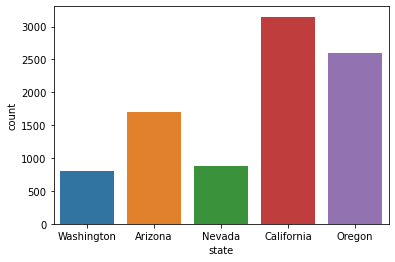

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


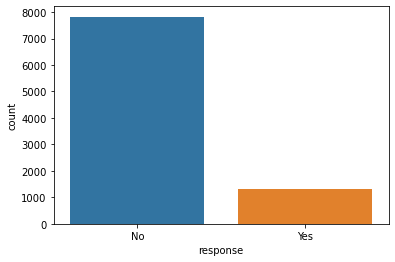

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


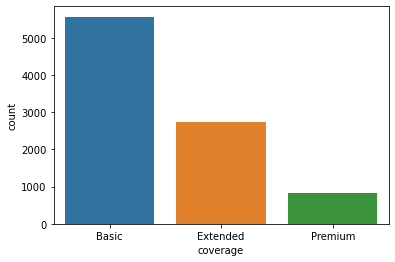

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


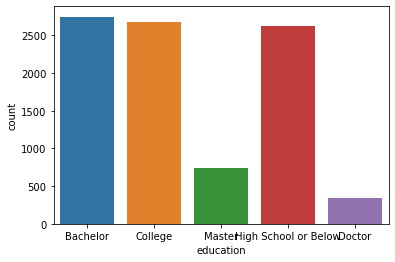

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


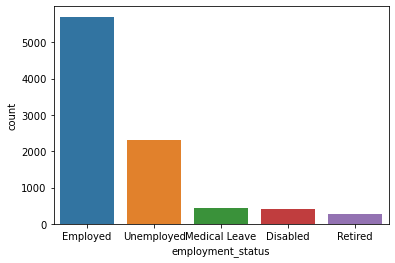

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


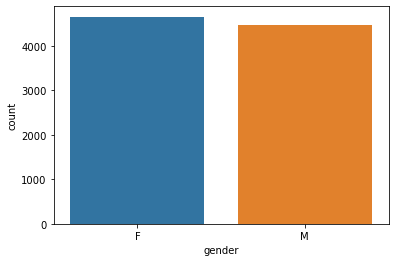

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


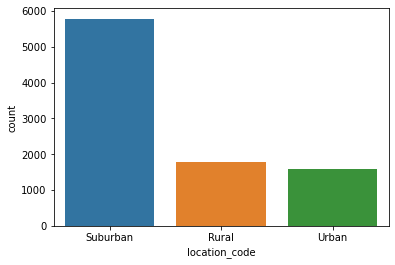

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


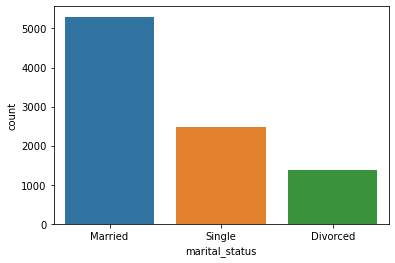

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


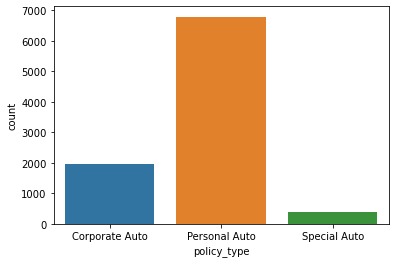

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


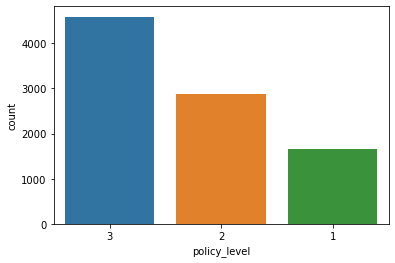

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


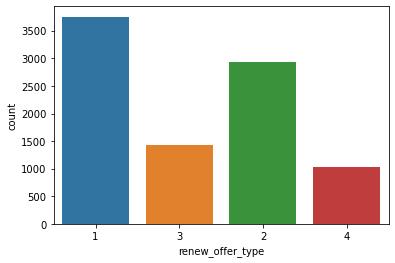

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


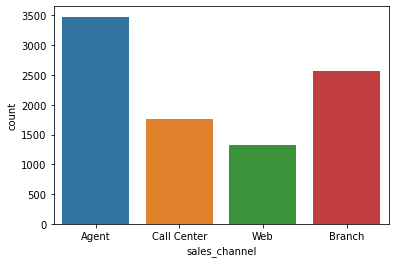

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


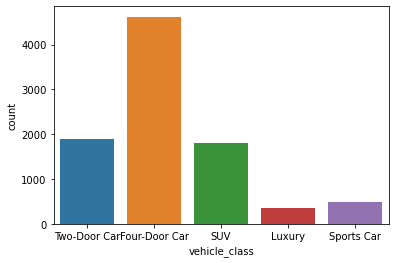

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


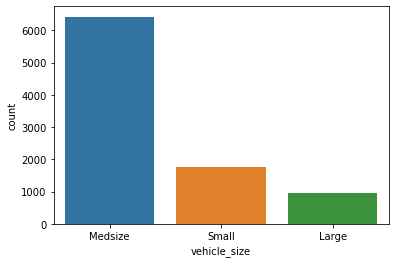

In [31]:
con_plotter(categorical)

# We can see the distribution per category using the count plot.
# State: we see that we have more data for California and Oregon than the other states
# Response: we have a much higher no response than yes
# Coverage: we have a far greater basic coverage than the other 2
# Education: We have a lower education level for Mastersa and Doctor
# Employment Status: We see that the majority of customers are indeed employed
# Gender: this seems pretty balanced with a slightly higher number of females
# Location code: the majority of the customers live in Suburban areas
# Martial Status: majority are married
# Policy Type: there are by far more personal auto policy types
# Policy/Policy Level: We see that there are more policy level 3 than the other 2
# Renew Offer Type: the majority have a renew offer of 1 followed by 2. Telling us that the churn level might be high
# Sales Channel: We see the majoriyt of sales come from Agents and Branch
# Vehicle Class: Four door cars are the most comment car class
# Vehicle Size: We see the majority size is medium

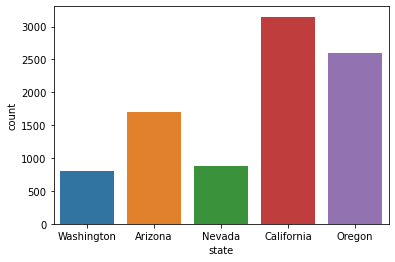

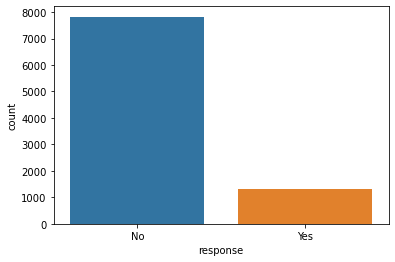

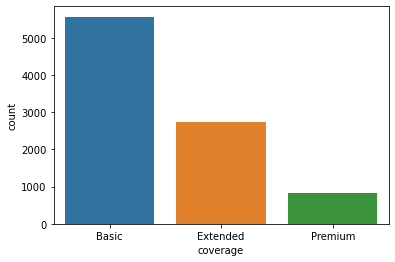

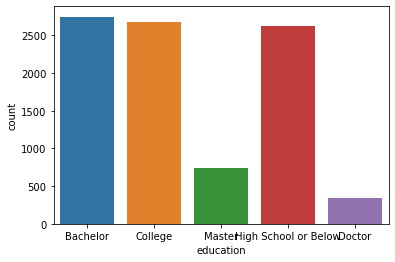

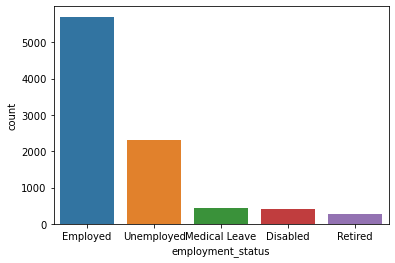

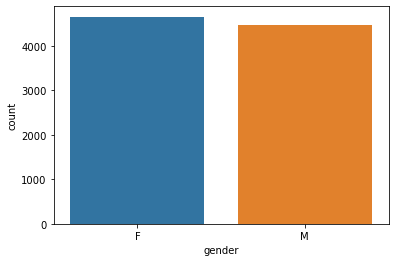

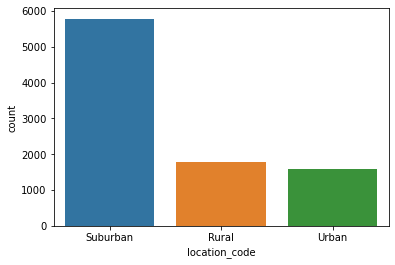

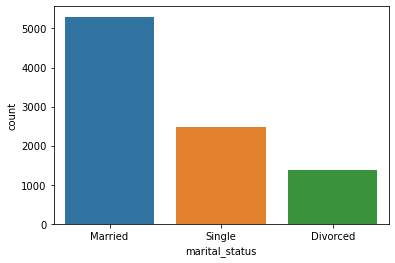

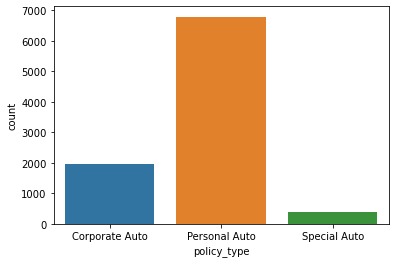

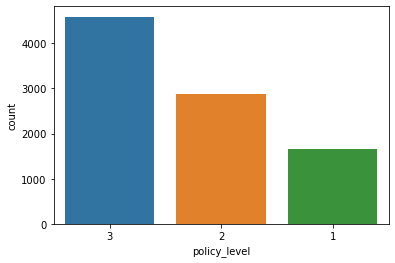

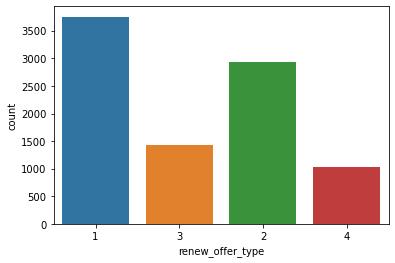

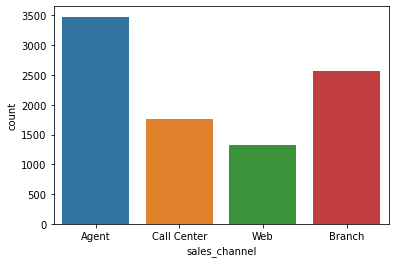

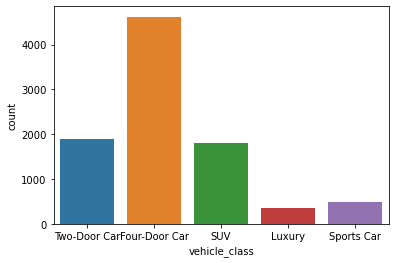

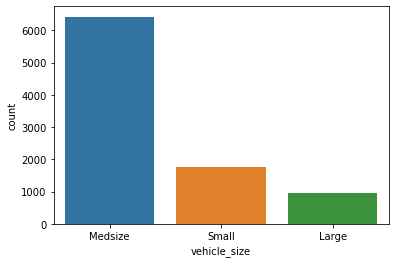

In [32]:
# Another way to plot the bars without a function
for i in categorical.columns:
    sns.countplot(x=categorical_df[i], data = categorical)
    plt.show()


## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [33]:
# We already dropped the columns we thought were redundant previously. They were:
# Customer and effective_to_date

## 4. Plot time variable. Can you extract something from it?

In [34]:
# As we already dropped effective_to_date, I will bring it back to plot the graph

In [35]:
effective_to_date_df

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


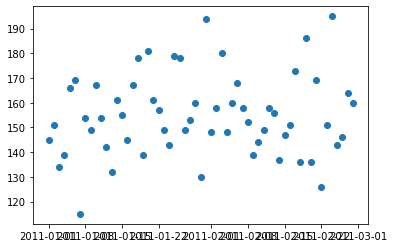

In [39]:
import matplotlib.dates

from datetime import datetime
x_values = effective_to_date_df.effective_to_date.unique()
y_values = effective_to_date_df.effective_to_date.value_counts()

dates = matplotlib.dates.date2num(x_values)
matplotlib.pyplot.plot_date(dates, y_values)

# In this form, it's difficult to extract anything from the effective_to_date
# Maybe if we group by months, we can see something

In [43]:
effective_to_date_df['month'] = pd.DatetimeIndex(effective_to_date_df.effective_to_date).month
effective_to_date_df['year'] = pd.DatetimeIndex(effective_to_date_df.effective_to_date).year
effective_to_date_df

,effective_to_date,month,year
0,2011-02-24,2,2011
1,2011-01-31,1,2011
2,2011-02-19,2,2011
3,2011-01-20,1,2011
4,2011-02-03,2,2011
...,...,...,...
9129,2011-02-10,2,2011
9130,2011-02-12,2,2011
9131,2011-02-06,2,2011
9132,2011-02-03,2,2011


In [47]:
print(effective_to_date_df['year'].unique())
print(effective_to_date_df['month'].unique())

[2011]
[2 1]


In [49]:
effective_to_month_df = pd.DataFrame(effective_to_date_df.month)
effective_to_month_df

,month
0,2
1,1
2,2
3,1
4,2
...,...
9129,2
9130,2
9131,2
9132,2


<AxesSubplot:xlabel='month', ylabel='count'>

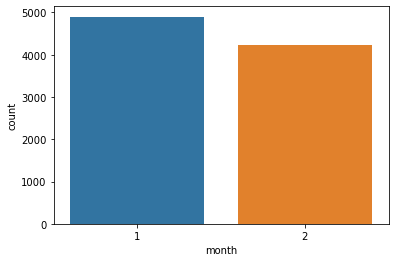

In [54]:
# Now we see that slightly more customers joined in January than February 
sns.countplot(x = effective_to_month_df.month, data = effective_to_month_df)